In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

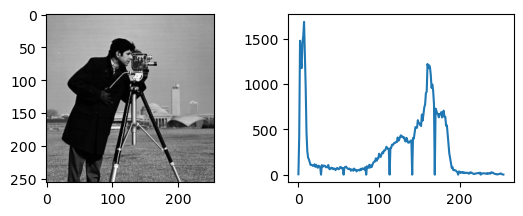

In [2]:
img = cv2.imread('./Fig0222(b)(cameraman).tif',0)
hst,f,c=plt.hist(img.flatten(), bins=255)
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.plot(hst);

### Equation for Image contrast streching using historgram
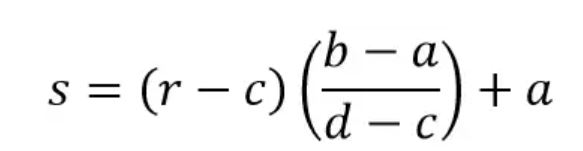

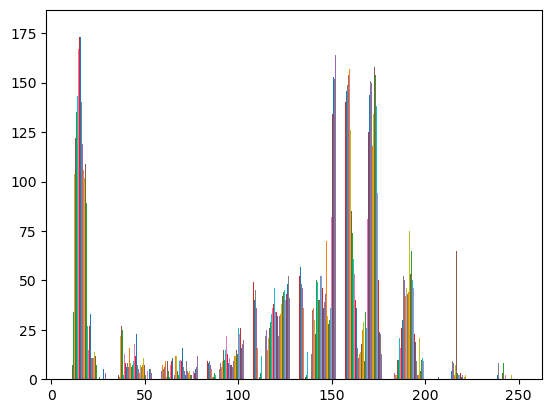

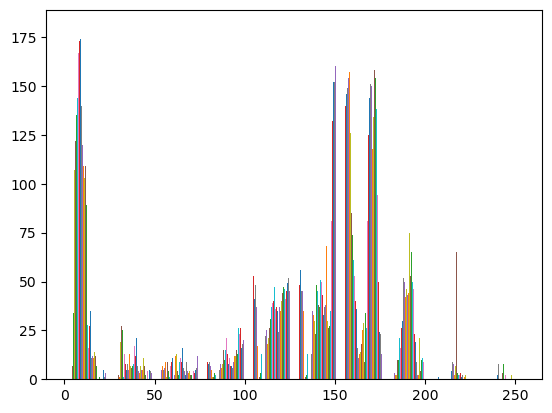

In [3]:
im = cv2.imread('./Fig0222(b)(cameraman).tif',0)
#create output image
im_out = np.zeros((im.shape[0],im.shape[1],3), dtype=np.uint8)
#compute upper and lower bounds according to formula
a, b = 0, 255
c, d = im.min(), im.max()
#get image shape height, width and num. of channels and apply formula
im_out = np.zeros((im.shape[0],im.shape[1]), dtype=np.uint8)
h, w = im.shape
im_out[0:h, 0:w] = (im[0:h, 0:w] - c)*((b - a)/(d-c)) + a
plt.hist(im); plt.show()
plt.hist(im_out); plt.show()

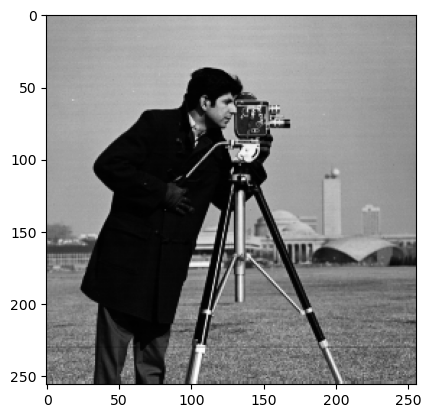

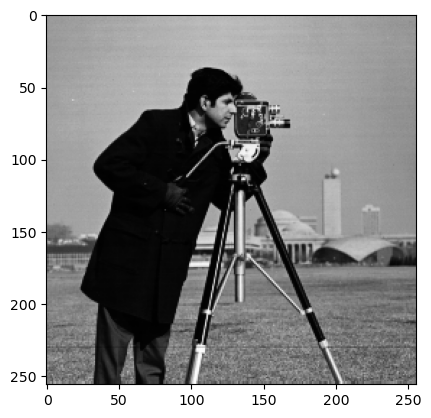

In [4]:
plt.imshow(im, 'gray'); plt.show()
plt.imshow(im_out,'gray'); plt.show()

### Histogram equalization

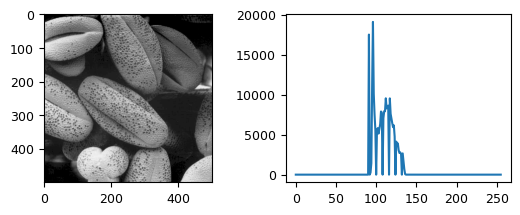

In [26]:
# example 1 pollen image
img = cv2.imread('./Fig0320(2)(2nd_from_top).tif',0)
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.plot(hist1);

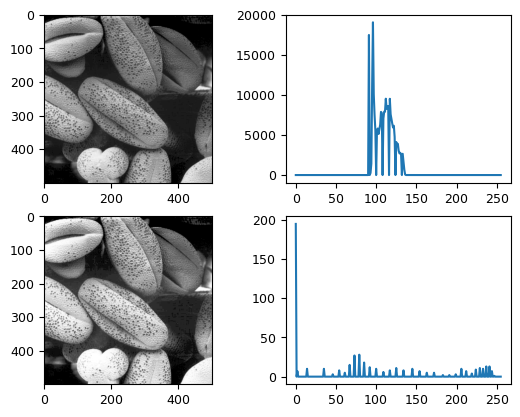

In [27]:
# example 1 with equalized histogram
img = cv2.imread('./Fig0320(2)(2nd_from_top).tif',0)
hist1 = cv2.calcHist([img], [0],None,[256],[0,256])
img2 = cv2.equalizeHist(img)
hist2 = cv2.calcHist(img2,[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.plot(hist1);
plt.subplot(223),plt.imshow(img2,'gray');
plt.subplot(224),plt.plot(hist2);

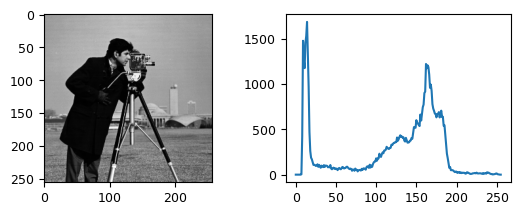

In [28]:
#example 2 with for histogram equalization
img = cv2.imread('./Fig0222(b)(cameraman).tif',0)
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.plot(hist1);

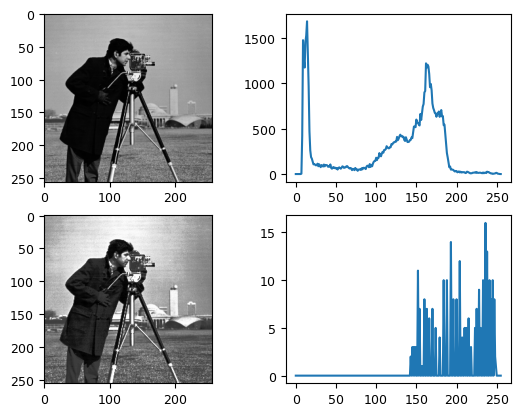

In [30]:
# eqaulized histogram of above image in example 2
img = cv2.imread('./Fig0222(b)(cameraman).tif',0)
hist1 = cv2.calcHist([img], [0],None,[256],[0,256])
img2 = cv2.equalizeHist(img)
hist2 = cv2.calcHist(img2,[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.plot(hist1);
plt.subplot(223),plt.imshow(img2,'gray');
plt.subplot(224),plt.plot(hist2);

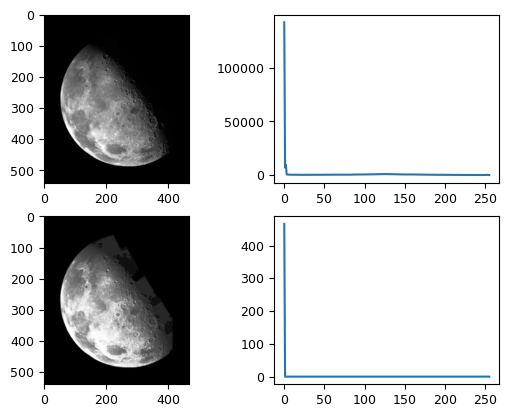

In [31]:
#example 3 of histogram equalization
img = cv2.imread('./moon.tif',0)
hist1 = cv2.calcHist([img], [0],None,[256],[0,256])
img2 = cv2.equalizeHist(img)
hist2 = cv2.calcHist(img2,[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.plot(hist1);
plt.subplot(223),plt.imshow(img2,'gray'); #remove the word gray from imshow function
plt.subplot(224),plt.plot(hist2);

### To see the visualization of difference before and after histogram equalization
    1.Due to very small distribution of intensities the above moon images are not much clearer. To see the effect uncomment the commented code.

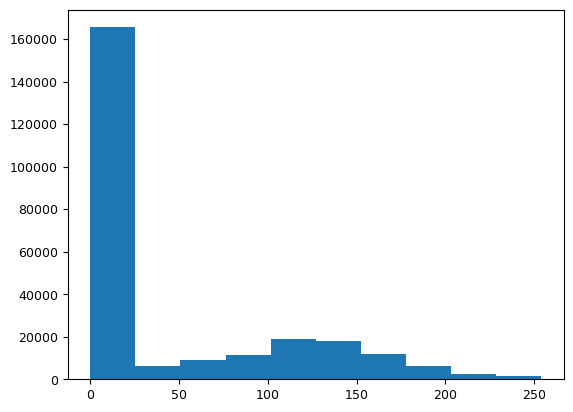

In [32]:
moon = cv2.imread('./moon.tif',0)
plt.hist(moon.flatten()); plt.show()

### Histogram matching/Specification:
    - For histogram matching there should be a reference image.
    - First plot histogram for both images
    - If the histogram of original image matches with reference image we consider that region as match.

C:\Users\kaleem ullah\AppData\Local\Temp\ipykernel_16060\1788156723.py:12: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference ,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


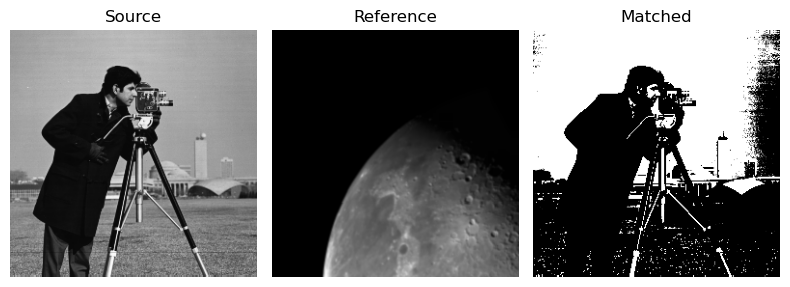

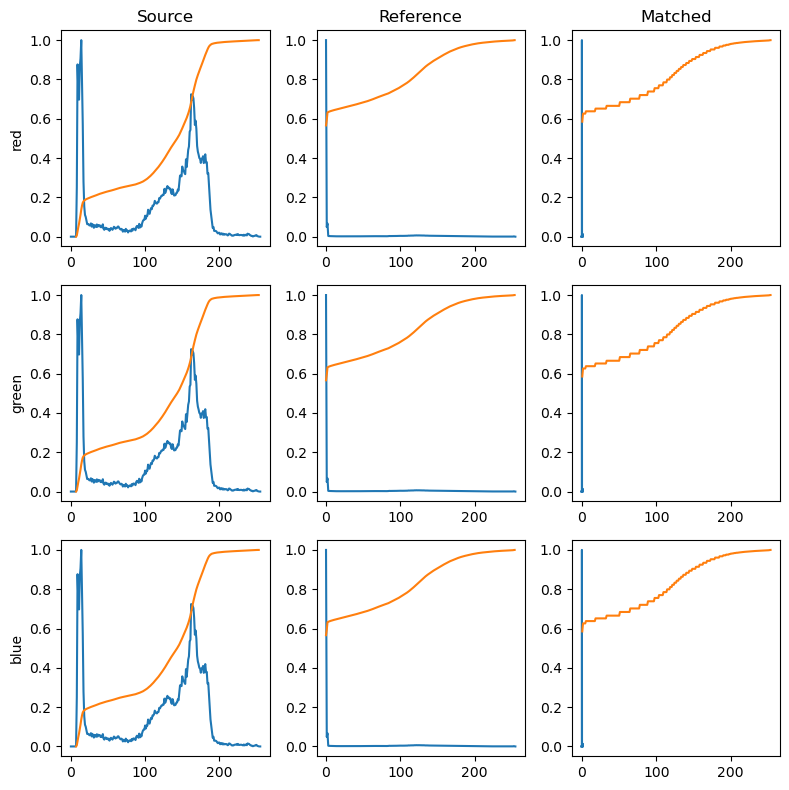

In [12]:
from skimage import exposure
from skimage.exposure import match_histograms
  
# reading main image
img1 = cv2.imread('./Fig0222(b)(cameraman).tif')
#reading reference image
img2 = cv2.imread("./moon.tif")

image = img1
reference = img2
  
matched = match_histograms(image, reference ,
                           multichannel=False)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
  
plt.tight_layout()
plt.show()
  
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
  
for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], 
                                            source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')
  
plt.tight_layout()
plt.show()

### Local Histogram Equalization

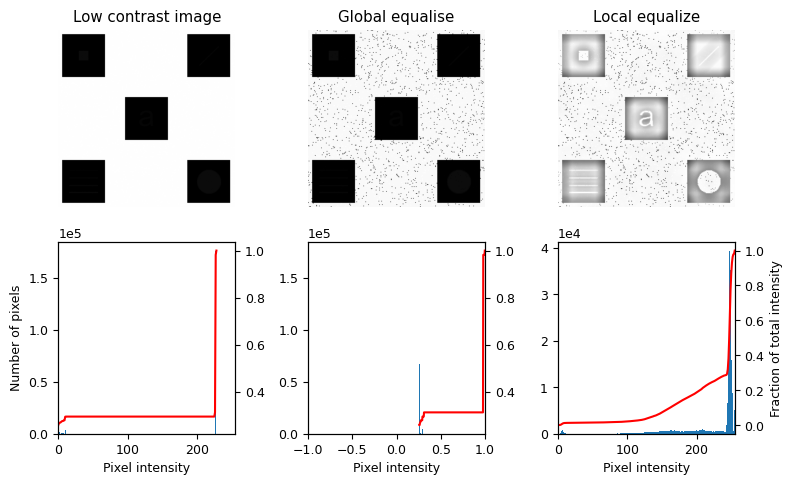

In [35]:
#example for local histogram equalization
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank
from skimage.io import imread


plt.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
# img = img_as_ubyte(data.moon())
img = imread('./Fig0326(a)(embedded_square_noisy_512).tif')

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

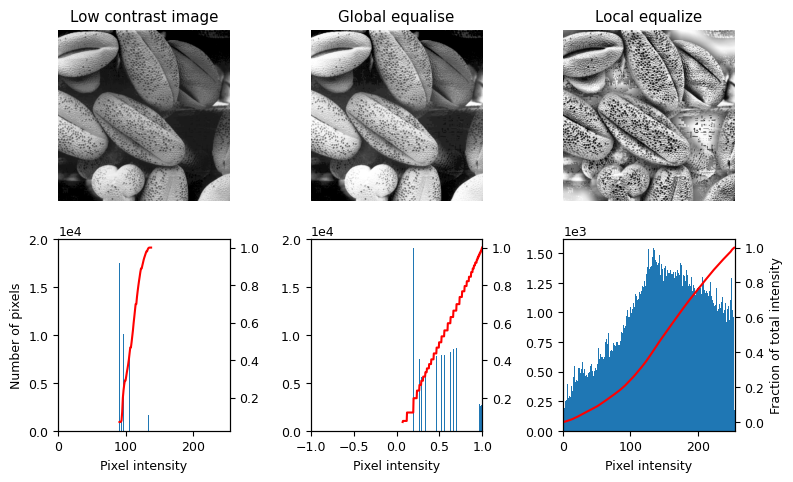

In [34]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
# img = img_as_ubyte(data.moon())
img = imread('./Fig0320(2)(2nd_from_top).tif')

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

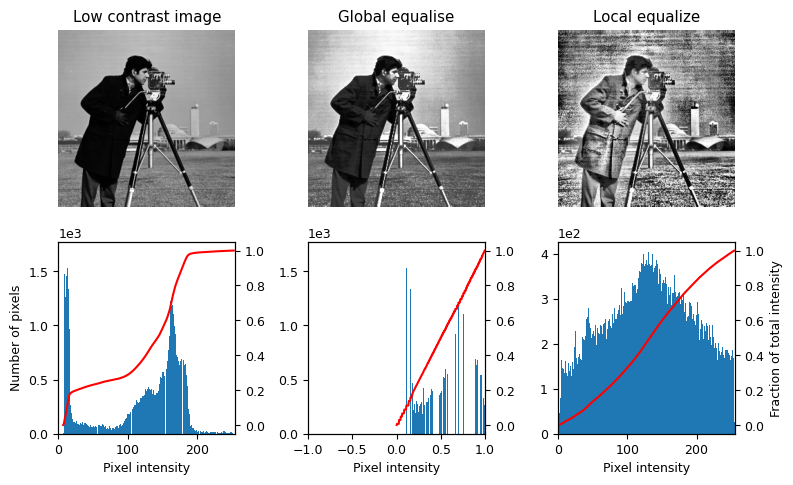

In [36]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
# img = img_as_ubyte(data.moon())
img = imread('./Fig0222(b)(cameraman).tif')

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

### Local Enhancement Using statistical aproach

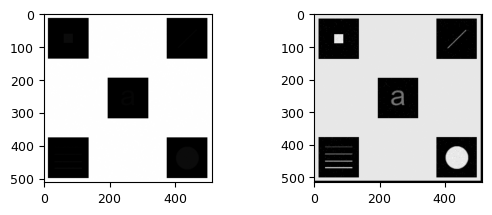

In [56]:
img = cv2.imread('./Fig0326(a)(embedded_square_noisy_512).tif',0)
img2 = np.pad(img,(2,2), 'constant')
mean = img.mean()
std = img.std()
result = np.zeros((img2.shape[0], img2.shape[1]))
k0,k1,k2,k3 = 0,0.1,0,0.1
c=22.8
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        m = np.mean(img2[i:i+3,j:j+3])
        s = np.std(img2[i:i+3, j:j+3])
        if (m>k0*mean and m<k1*mean) and (s>=k2*std and s<=k3*std):
            result[i,j] = img2[i,j]*c
        else:
            result[i,j] = img2[i,j]
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.imshow(result,'gray');

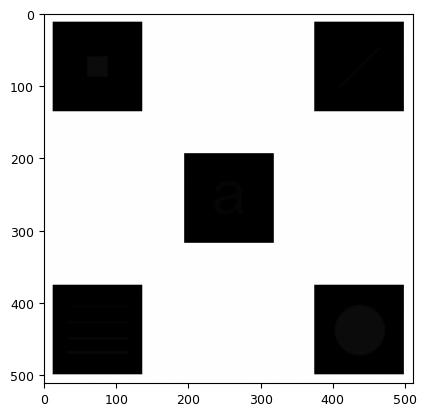

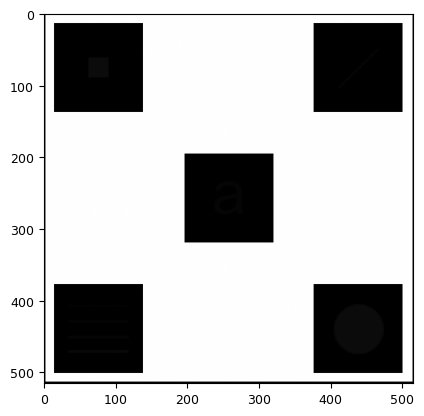

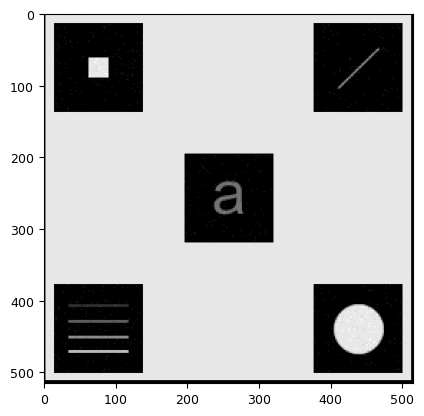

In [53]:
plt.subplot()
plt.imshow(img, 'gray')
plt.show()
plt.imshow(img2, 'gray')
plt.show()
plt.imshow(result, 'gray'); plt.show()